In [231]:
"""
An example of using TensorFlow for building a regression model is given here. A class is defined that imports the data and train/test them on a simple regression model.
Data set 'house_pricing.csv' is used in the example to demonstrate the regression model.
"""

"\nAn example of using TensorFlow for building a regression model is given here. A class is defined that imports the data and train/test them on a simple regression model.\nData set 'house_pricing.csv' is used in the example to demonstrate the regression model.\n"

In [232]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import seaborn as sns

tf.test.is_gpu_available()

True

In [233]:
class SimpleRegressionModel:
    """
    SimpleRegressionModel trains and tests a regression model using the given data frame.
    """
    def __init__(self):
        self.num_input = None
        self.num_output = None
        self.scalar = None
        self.num_training = None
        self.X_train = None
        self.Y_train = None
        self.num_validation = None
        self.X_val = None
        self.Y_val = None
        self.history = None
        self.num_test = None
        self.X_test = None
        self.Y_test = None
        self.model = None
    def import_dataset(self, df_total: pd.DataFrame, iplist: list, oplist: list, validation_size: float, test_size: float):
        total_X = df_total[df_total.columns.intersection(iplist)]
        object_columns = total_X.select_dtypes(include=['object'])
        if not object_columns.empty:
            dummy_columns = pd.get_dummies(object_columns)
            total_X = pd.concat([total_X.drop(object_columns, axis=1), dummy_columns], axis=1)
        self.num_input = len(total_X.columns)
        total_Y = df_total[df_total.columns.intersection(oplist)]
        self.num_output = len(total_Y.columns)
        train_val_X, self.X_test, train_val_Y, self.Y_test = train_test_split(total_X, total_Y, test_size=test_size, random_state=None)
        self.num_test = len(self.X_test.index)
        if validation_size == 0:
            self.X_train = train_val_X
            self.Y_train = train_val_Y
            self.X_val = []
            self.Y_val = []
            self.num_training = len(self.X_train.index)
            self.num_validation = 0
        else:
            self.X_train, self.X_val, self.Y_train, self.Y_val = train_test_split(train_val_X, train_val_Y, test_size=validation_size/(1-test_size), random_state=None)
            self.num_training = len(self.X_train.index)
            self.num_validation = len(self.X_val.index)
        print("Dataset size: training: {}, validation: {}, test: {}".format(self.num_training, self.num_validation, self.num_test))
        self.scalar = MinMaxScaler()
        self.X_train = self.scalar.fit_transform(self.X_train)
        if validation_size == 0:
            pass
        else:
            self.X_val = self.scalar.transform(self.X_val)
        self.X_test = self.scalar.transform(self.X_test)
    def design_model(self, hidden_layer_model: list, optimizer: str, learning_rate: float, loss: str):
        """
        The input model describes the design of the model. It is a list of layers. Each layer is given by a dictionary describing layer type, number of nodes, etc.
        """
        self.model = tf.keras.Sequential()
        for ind in range(len(hidden_layer_model)):
            if ind == 0:
                if hidden_layer_model[ind]["type"] == "dense":
                    layer = tf.keras.layers.Dense(hidden_layer_model[ind]["node"], activation = hidden_layer_model[ind]["activation"], input_shape = (self.num_input, ))
                else:
                    pass
            else:
                if hidden_layer_model[ind]["type"] == "dense":
                    layer = tf.keras.layers.Dense(hidden_layer_model[ind]["node"], activation = hidden_layer_model[ind]["activation"])
                else:
                    pass
            self.model.add(layer)
        self.model.add(
            tf.keras.layers.Dense(self.num_output, activation='relu')
        )
        self.model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
    def train_model(self, epochs: int, batch_size: int):
        self.history = self.model.fit(self.X_train, self.Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
        df_history = pd.DataFrame(self.history.history)
        df_history.plot()
    def evaluate_model(self):
        if self.num_validation == 0:
            print("Validation set is empty.")
        else:
            loss, mae = self.model.evaluate(self.X_val, self.Y_val, verbose=2)
            print("Validation set test result: loss={}, mae={}".format(loss, mae))
    def test_model(self):
        loss, mae = self.model.evaluate(self.X_test, self.Y_test, verbose=2)
        print("Test set test result: loss={}, mae={}".format(loss, mae))

In [234]:
df_house_pricing = pd.read_csv("house_pricing.csv").dropna()
df_house_pricing

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [235]:
srm = SimpleRegressionModel()
srm.import_dataset(
    df_total=df_house_pricing,
    iplist=["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "condition", "city"],
    oplist=["price"],
    validation_size=0, test_size=0.2)

Dataset size: training: 3680, validation: 0, test: 920


In [236]:
hidden_layer_model = [
    {
        "type": "dense",
        "node": 128,
        "activation": "relu"
    },
    {
        "type": "dense",
        "node": 128,
        "activation": "relu"
    },
    {
        "type": "dense",
        "node": 64,
        "activation": "relu"
    },
    {
        "type": "dense",
        "node": 64,
        "activation": "relu"
    },
    {
        "type": "dense",
        "node": 32,
        "activation": "relu"
    },
    {
        "type": "dense",
        "node": 32,
        "activation": "relu"
    },
    {
        "type": "dense",
        "node": 16,
        "activation": "relu"
    },
]
srm.design_model(hidden_layer_model=hidden_layer_model, optimizer='rmsprop', learning_rate=0.001, loss='mse')

Train on 2944 samples, validate on 736 samples
Epoch 1/200
2944/2944 - 1s - loss: 445109169997.9130 - mean_absolute_error: 546283.1875 - val_loss: 1395103606516.8696 - val_mean_absolute_error: 587909.5625
Epoch 2/200
2944/2944 - 0s - loss: 445083672219.8261 - mean_absolute_error: 546261.4375 - val_loss: 1395034662644.8696 - val_mean_absolute_error: 587853.5000
Epoch 3/200
2944/2944 - 0s - loss: 444947001165.9130 - mean_absolute_error: 546144.1250 - val_loss: 1394745210078.6086 - val_mean_absolute_error: 587618.1250
Epoch 4/200
2944/2944 - 0s - loss: 444472657296.6956 - mean_absolute_error: 545745.5625 - val_loss: 1393893230681.0435 - val_mean_absolute_error: 586925.5625
Epoch 5/200
2944/2944 - 0s - loss: 443261872573.2173 - mean_absolute_error: 544717.5625 - val_loss: 1391932769680.6956 - val_mean_absolute_error: 585328.8750
Epoch 6/200
2944/2944 - 0s - loss: 440699054525.2173 - mean_absolute_error: 542512.8125 - val_loss: 1388042643901.2173 - val_mean_absolute_error: 582145.1875
Epoch

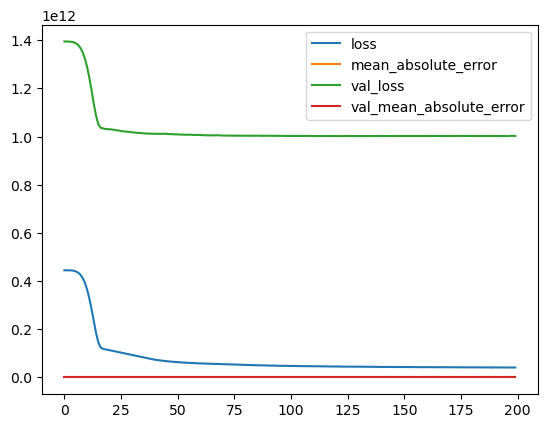

In [237]:
srm.train_model(epochs=200, batch_size=256)

In [238]:
srm.evaluate_model()

Validation set is empty.


In [239]:
srm.test_model()

920/920 - 0s - loss: 218358438279.7913 - mean_absolute_error: 129230.1797
Test set test result: loss=218358438279.7913, mae=129230.1796875
